## **Neural Network Regression in TensorFlow**

👁️👁️ Looking to solve Regression Problems

 - Architecture of a neural network regression model
 - Input shapes and output shapes of a regression model (**features** and labels)
 - Creating custom data to view and fit
 - Steps in modelling
  - Creating a model, compiling a model, fitting a model, evaluating a model.
 - Different evaluation methods
 - Saving and loading models

In [1]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


### Creating data to view and fit

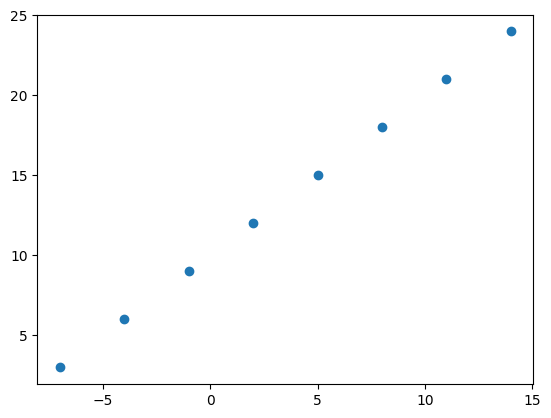

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)


In [3]:
# This is how we get y values from this values (the linear regression of this very simple model)
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [4]:
y == X + 10


array([ True,  True,  True,  True,  True,  True,  True,  True])

#### Input and Output Shapes

In [5]:
# Create a demo tenosr for our housing price prediction problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

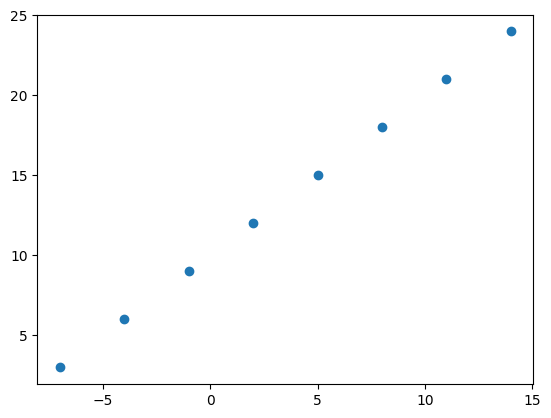

In [10]:
plt.scatter(X, y)


### Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how worng it is), the optimizer (tells our model how to improve the patterns its learning), and the evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features & labels). Epochs - How many times the model will go through all of the training examples
4. **Evaluate the model** on the test data (how reliable are our models predictions?)


In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create amodel using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
]) # into a list method

# add method
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #SGD is short for Stochastic Gradient Descent
              metrics=['mae'])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 6s 6s/step - loss: 11.6503 - mae: 11.6503
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 11.5178 - mae: 11.5178
Epoch 3/5
1/1 [==============================] - 0s 22ms/step - loss: 11.3853 - mae: 11.3853
Epoch 4/5
1/1 [==============================] - 0s 18ms/step - loss: 11.2528 - mae: 11.2528
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 11.1203 - mae: 11.1203


In [12]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Try and make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 313ms/step


array([[12.0093155]], dtype=float32)

### Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization fucntion or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit the model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [14]:
# Rebuilding our model

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 14.4382 - mae: 14.4382
Epoch 2/100
1/1 [==============================] - 0s 47ms/step - loss: 14.3057 - mae: 14.3057
Epoch 3/100
1/1 [==============================] - 0s 40ms/step - loss: 14.1732 - mae: 14.1732
Epoch 4/100
1/1 [==============================] - 0s 34ms/step - loss: 14.0407 - mae: 14.0407
Epoch 5/100
1/1 [==============================] - 0s 35ms/step - loss: 13.9082 - mae: 13.9082
Epoch 6/100
1/1 [==============================] - 0s 33ms/step - loss: 13.7757 - mae: 13.7757
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 13.6432 - mae: 13.6432
Epoch 8/100
1/1 [==============================] - 0s 36ms/step - loss: 13.5107 - mae: 13.5107
Epoch 9/100
1/1 [==============================] - 0s 30ms/step - loss: 13.3782 - mae: 13.3782
Epoch 10/100
1/1 [==============================] - 0s 35ms/step - loss: 13.2457 - mae: 13.2457
Epoch 11/100
1/1 [==============================] -

In [15]:
# Remind the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Let's see if the model prediction has improved
model.predict([17.])

1/1 [==============================] - 0s 93ms/step


array([[29.653025]], dtype=float32)

In [17]:
# Rebuilding (third time) our model
# Adding a hidden layer

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.1238 - mae: 13.1238
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 12.7207 - mae: 12.7207
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 12.3206 - mae: 12.3206
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 11.8885 - mae: 11.8885
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 11.4099 - mae: 11.4099
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 10.8546 - mae: 10.8546
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 10.1955 - mae: 10.1955
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 9.3831 - mae: 9.3831
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 8.3401 - mae: 8.3401
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.1913 - mae: 7.1913
Epoch 11/100
1/1 [==============================] - 0s 13

In [18]:
model.predict([17.])

1/1 [==============================] - 0s 73ms/step


array([[32.765446]], dtype=float32)

In [19]:
# Rebuilding our model

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.6055 - mae: 14.6055
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.9434 - mae: 13.9434
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 13.2815 - mae: 13.2815
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.6174 - mae: 12.6174
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 11.9478 - mae: 11.9478
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2706 - mae: 11.2706
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5837 - mae: 10.5837
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 9.8846 - mae: 9.8846
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 9.1705 - mae: 9.1705
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 8.4380 - mae: 8.4380
Epoch 11/100
1/1 [==============================] - 0s 10ms/

In [20]:
model.predict([25.])

1/1 [==============================] - 0s 56ms/step


array([[36.41331]], dtype=float32)

#### RECAP: Common ways to improve a deep model
- Adding layers
- Increase the number of hideen units
- Change the activation functions
- Change the optimization function
- Change the learning rate (👁️ The most useful hyperparameter to improve our neural network)
- Sampling more data (bigger datasets)
- Fitting training for longer (epochs)

### Evaluating a model

In practice a typical workflow you'll go through when building neural networks is:

```
Build model -> fit it -> evaluate it -> tweak model -> fit it -> evaluate it -> tweak model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it looks like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground thruth (the original labels)?


In [21]:
# Make a bigger data set
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
# Make labels for the data set
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

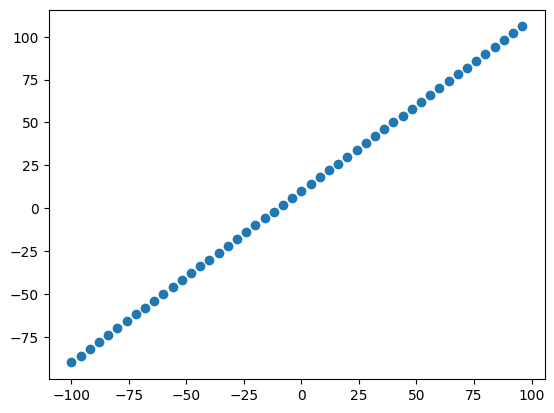

In [23]:
# Visualize the data
plt.scatter(X,y)

#### The three sets...

* Training set - the models learns from this data, which is typlically 70-80% of the data available.
* Validation set - the model gets tuned on this data, which is typpically 10-15% of the data.
* Test set - the model gets evaluated on this data to test what is has learned, this set is typlically 10-15% of the total of the data.

Generalization - The ability for a machine learning model to perform well on data it hasn't seen before.

In [24]:
# Check the length of the samples we have
len(X)

50

In [25]:
# Split into training and test (this data is too small for validation)
X_train = X[:40] # The first 40 are trainig samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # the last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

#### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again

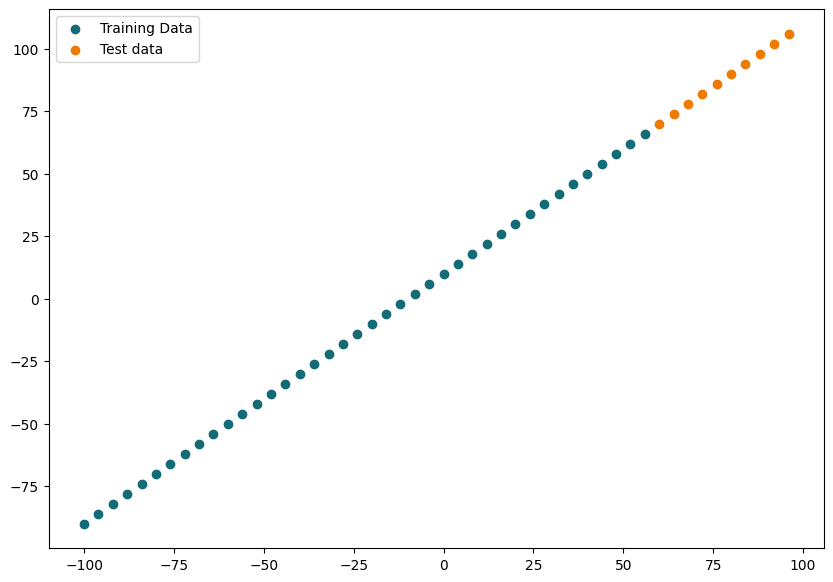

In [26]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='#126b75', label='Training Data')
# Plot test data in green
plt.scatter(X_test, y_test, c='#EE7A01', label='Test data')
# Show a legend
plt.legend()

In [27]:
# Let´s have a look up at how to build a neural network for our data

# 1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# # 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

#### Visualizing the model

In [28]:
# Let's create a model which builds automatically by defining the imput_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name="model_1")

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [29]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable params - these are the patterns the model can update as it trains
* Non-trainable - these parameters aren't updated during training (this is typical when you brought parameters from other models during **transfer learning**)

👁️ **Resource:** Fore a more in-depth overview check:

https://www.youtube.com/watch?v=QDX-1M5Nj7s&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=2

MIT - Introduction to Deep Learning
http://introtodeeplearning.com/

⚒️ **Exercise** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [30]:
# Let`s fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

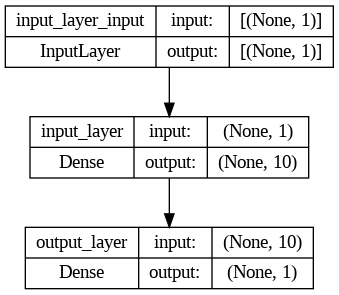

In [31]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

#### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model`s predictions).

In [32]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 66ms/step


array([[ 69.578316],
       [ 74.100586],
       [ 78.62286 ],
       [ 83.14513 ],
       [ 87.6674  ],
       [ 92.189674],
       [ 96.711945],
       [101.23421 ],
       [105.756485],
       [110.278755]], dtype=float32)

In [33]:
# Remember X_test values
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

👁️ **Note:** If you feel like you`re going to reuse some kind of functionality in the future is a good idea to turn it into a function

In [34]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10,7))
  # Plot training data in one color
  plt.scatter(train_data, train_labels, c='#126b75', label='Training Data')
  # Plot test data in another color
  plt.scatter(test_data, test_labels, c='#EE7A01', label='Test data')
  # Plot model's predictions in the other color
  plt.scatter(test_data, predictions, c='#94192a', label='Predictions')
  # Show a legend
  plt.legend();




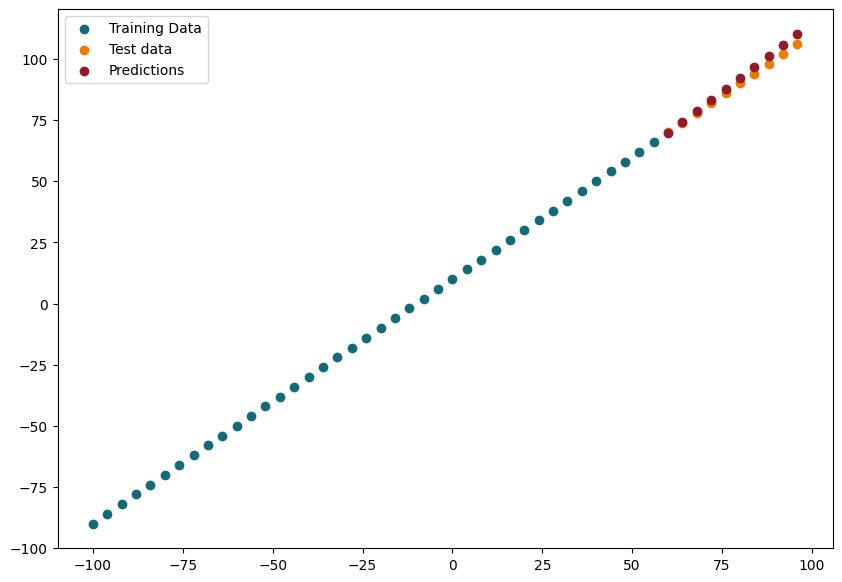

In [35]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                test_labels=y_test,
                predictions=y_pred)

#### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you are working on, there will be different evalutaion metrics to evaluate your model's performance.

Working in a Regression, two of the main metrics are:
* MAE - mean absolute error, "on average, how worng is each of my model's predictions".
* MSE - mean square error, "square the average errors"

In [36]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 229ms/step - loss: 2.0129 - mae: 2.0129


[2.0128722190856934, 2.0128722190856934]

In [37]:
tf.constant(tf.squeeze(y_pred))


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.578316,  74.100586,  78.62286 ,  83.14513 ,  87.6674  ,
        92.189674,  96.711945, 101.23421 , 105.756485, 110.278755],
      dtype=float32)>

In [38]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [39]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(tf.squeeze(y_pred)))
mae


<tf.Tensor: shape=(), dtype=float32, numpy=2.0128722>

👁️ If we are trying to compare Tensors we need to make shapes and dtypes equal to each other:

That's why we use:
`y_pred=tf.constant(tf.squeeze(y_pred))`

In [40]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                   y_pred=tf.constant(tf.squeeze(y_pred)))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=5.9695764>

In [41]:
# Make functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

In [42]:
mse(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=5.9695764>

### Runnning experiments to improve our model experiments


```
Build model -> fit it -> evaluate it -> tweak model -> fit it -> evaluate it -> tweak model -> fit it -> evaluate it...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer -  give your model more of a chance to find patterns in the data

Let's do three model experiments:

1. `model_1` - same as the original model, 1 layer, trained por 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.
4.
5.

**Build** `model_1`


In [43]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 18.5091 - mae: 18.5091
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 13.5324 - mae: 13.5324
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 12.3172 - mae: 12.3172
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.3118 - mae: 9.3118
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1820 - mae: 10.1820
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4432 - mae: 9.4432
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5814 - mae: 8.5814
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0468 - mae: 9.0468
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7760 - mae: 18.7760
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1290 - mae: 10.1290
Epoch 11/100
2/2 [==============================] - 0s 10ms/step -

1/1 [==============================] - 0s 48ms/step


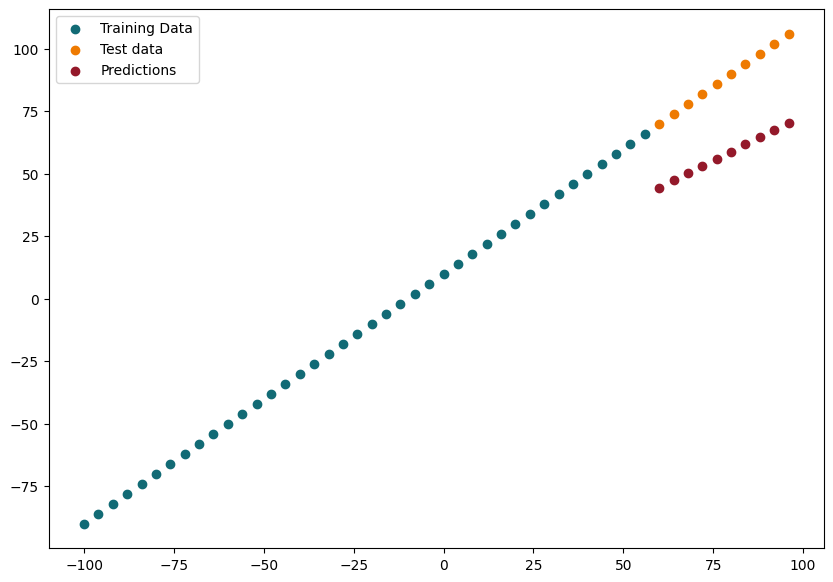

In [44]:
# Make and plot predictions to model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [45]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.57342>,
 <tf.Tensor: shape=(), dtype=float32, numpy=945.1168>)

**Build** `model_2`

In [46]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics='mse')

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 34.1709 - mse: 1615.2811
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 27.8061 - mse: 1018.2609
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 33.3978 - mse: 1655.7207
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 25.2600 - mse: 927.9274
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.9340 - mse: 280.1299
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8772 - mse: 168.2737
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2038 - mse: 151.7646
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1031 - mse: 160.8415
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 40.6111 - mse: 2605.1279
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 27.9878 - mse: 1104.0743
Epoch 11/100
2/2 [=========================

1/1 [==============================] - 0s 49ms/step


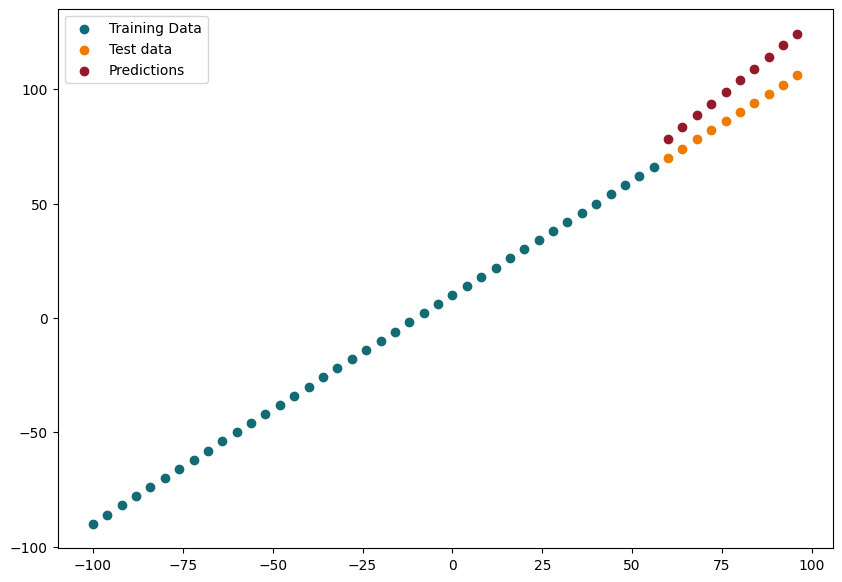

In [47]:
# Make predictions and plotting into a scatter plot using previous function
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [48]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.243564>,
 <tf.Tensor: shape=(), dtype=float32, numpy=185.39198>)

**Build** `model_3`

In [49]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3  = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics='mse')

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 43.5908 - mse: 2569.7971
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 32.8221 - mse: 1477.9785
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 22.7236 - mse: 718.2480
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 13.2322 - mse: 287.7167
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 13.5393 - mse: 204.3370
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 14.2863 - mse: 214.4019
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 10.8159 - mse: 138.7714
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 7.2504 - mse: 62.9934
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 6.2631 - mse: 64.1681
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 8.1075 - mse: 97.0533
Epoch 11/100
2/2 [==============================] - 

1/1 [==============================] - 0s 58ms/step


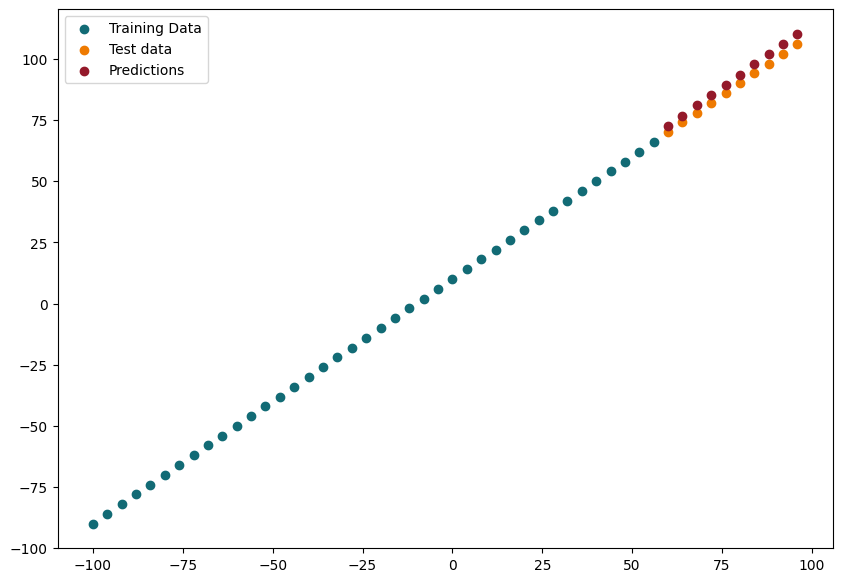

In [50]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [51]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=3.4131522>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.913481>)

👁️ **NOTE:** You want to start with small experiments (small models) and make sure they work and then improve the model that works better

### Comparing the results of our experiments

We've run a few experiments, let´s comapre the results

In [52]:
# Let´s compare our model's result using a pandas DataFrame
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=['model','mae','mse'])
all_results

,model,mae,mse
0,model_1,30.573420,945.116821
1,model_2,13.243564,185.391983
2,model_3,3.413152,11.913481


In [53]:
model_2.summary(), model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               200       
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 

(None, None)

👁️ **NOTE:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don´t work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment"

### Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And doing so, it can be tedius if you're running lots of experiments.

Luckily, there are tools to help us!

💊 **Resource** As you builkd more models you look into using:
* [TensorBoard](https://www.tensorflow.org/tensorboard) - a component of the TensorFlow library to help track modelling experiments
* [Weight and Biases](https://wandb.ai/site) - a tool for tracking all kinds of machine learning experiments (plugs straight to TensorBoard)

### Saving our models

Saving our models allows us to use them outside of Google Colab (or whereever they were trained) such in a web application or a mobile app.

There are tow main formats

1. The SavedModel format
2. The HDF5 format

In [54]:
# Save using SavedModel
model_3.save('best_model_SavedModel_format')

In [55]:
 # Save using HDF5
 model_3.save('best_model_HDF5_format.h5')

### Loading and using saved models

In [56]:
# Loading a SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('/content/best_model_SavedModel_format')

1/1 [==============================] - 0s 72ms/step


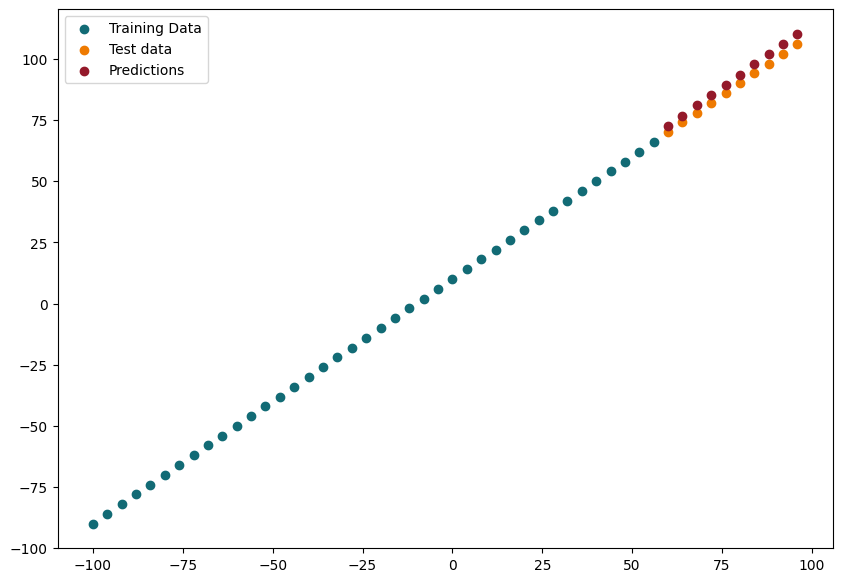

In [57]:
y_preds_4 = loaded_SavedModel_format.predict(X_test)
plot_predictions(predictions=y_preds_4)

In [58]:
y_preds_4

array([[ 72.61531 ],
       [ 76.790184],
       [ 80.96505 ],
       [ 85.13993 ],
       [ 89.31748 ],
       [ 93.49854 ],
       [ 97.67962 ],
       [101.8607  ],
       [106.0418  ],
       [110.2229  ]], dtype=float32)

In [59]:
loaded_SavedModel_format.summary()
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               200       
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               200       
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params

In [60]:
y_preds_3 == y_preds_4

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [61]:
# Loading a model using the HDF5 model
loaded_h5_model = tf.keras.models.load_model('/content/best_model_HDF5_format.h5')

1/1 [==============================] - 0s 77ms/step


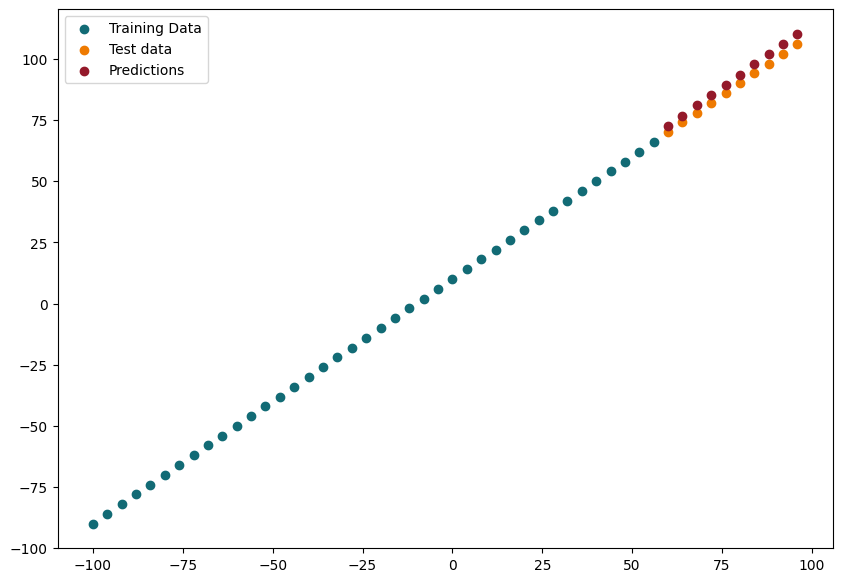

In [62]:
y_preds_5 = loaded_h5_model.predict(X_test)
plot_predictions(predictions=y_preds_5)

In [63]:
y_preds_3 == y_preds_5

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### Download a model (or any other file) from Google Colab

If you want to download from Colab:

1. You can go to the files tab and right click on the file
2. Use code (see the cell below)
3. Saving to GoogleDrive

In [64]:
# Download a file from Google Colab
from google.colab import files
files.download('/content/best_model_HDF5_format.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
# Save to Drive (first It needs to mount Drive in Colab; each session)
!cp /content/best_model_HDF5_format.h5 "/content/drive/MyDrive/Colab Notebooks/03_TF/ZTM_UDEMY"
# When the route has blank spaces we need to quote it

In [66]:
!ls '/content/drive/MyDrive/Colab Notebooks/03_TF/ZTM_UDEMY'

00_tensorflow_fundamentals.ipynb  01_neural_network_regression.ipynb
00_TF_Fund_EXERCISES.ipynb	  best_model_HDF5_format.h5


### A larger example

Using kaggle's "Medical Cost Personal Dataset", try to predict costs based in the other six columns of features.

👉👉 [dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance)

In [68]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [71]:
# Let's try to convert objets to numbers using one hot encoding technique
# get_dummies in pandas

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [72]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']


In [75]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [76]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [77]:
# Create training and test sets
# Using scikitlearn train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [78]:
len(X) == len(X_train) + len(X_test)

True

In [79]:
# Build a neural network (sort of like model 2 above)
# Set the random set_seed
tf.random.set_seed(42)

# 1. Create a model
model_in = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_in.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics='mse')

# 3. Fit the model
model_in.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 6ms/step - loss: 13206.2783 - mse: 318593824.0000
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 12281.1152 - mse: 292849792.0000
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 12171.0059 - mse: 288828320.0000
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12095.3867 - mse: 286812256.0000
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 11979.5654 - mse: 283298720.0000
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 11789.9023 - mse: 278840480.0000
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 11459.8584 - mse: 270596960.0000
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 10943.7100 - mse: 257212080.0000
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 10325.0732 - mse: 239850400.0000
Epoch 10/100
34/34 [==========================

In [80]:
# Check the results of the insurance model on the test data
model_in.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 8932.4766 - mse: 164721120.0000


[8932.4765625, 164721120.0]

In [82]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

It looks like the model is not performing too well...
Let's improve it!